## Import Libraries

In [1]:
import sys
sys.path.append('..')
from src.data_processing import load_data
from src.ploting import Ploter
ploter = Ploter()

## Overview of the Data

In [2]:
PATH = '../data/raw/data.csv'
df = load_data(PATH)
shape = df.shape
print(f'Data Shape: {shape}')
df.info()

Data Shape: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  


## Summary Statistics

In [3]:
df[['Amount','Value']].describe()

,Amount,Value
count,9.566200e+04,9.566200e+04
mean,6.717846e+03,9.900584e+03
std,1.233068e+05,1.231221e+05
min,-1.000000e+06,2.000000e+00
25%,-5.000000e+01,2.750000e+02
50%,1.000000e+03,1.000000e+03
75%,2.800000e+03,5.000000e+03
max,9.880000e+06,9.880000e+06


In [4]:
df.describe(include='object')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


## Distribution of Numerical Features

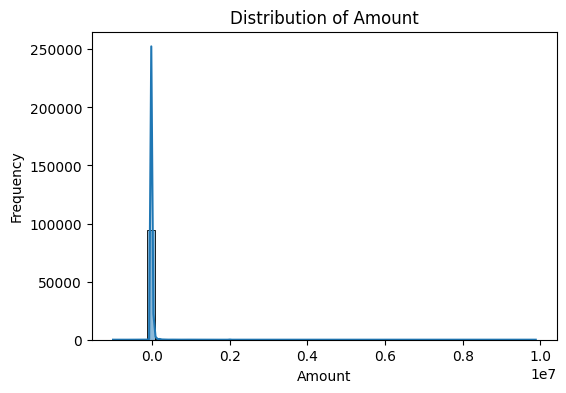

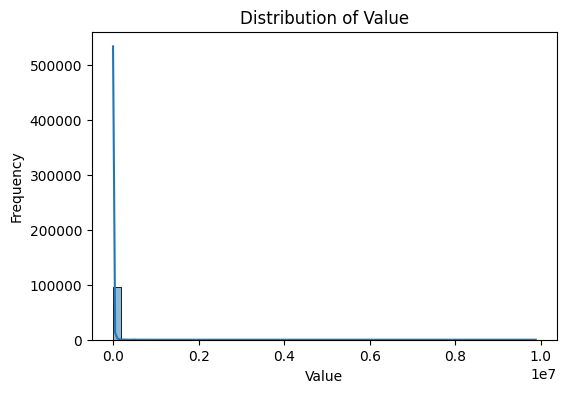

In [5]:
num_list = ['Amount','Value']
for col in df[num_list]:
    ploter.plot_hist(df, col)

## Distribution of Categorical Features

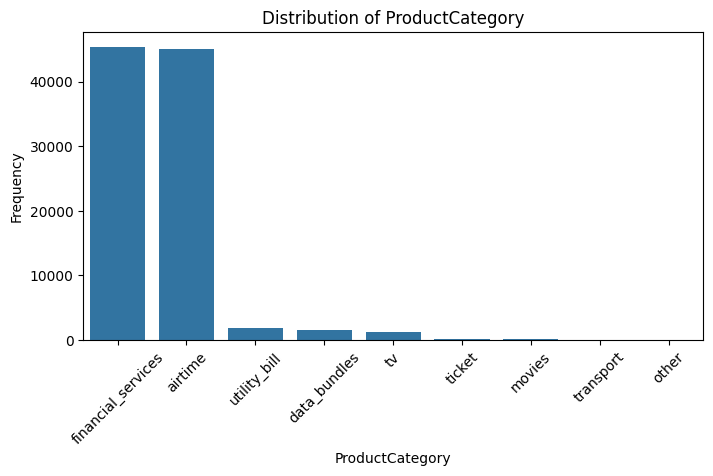

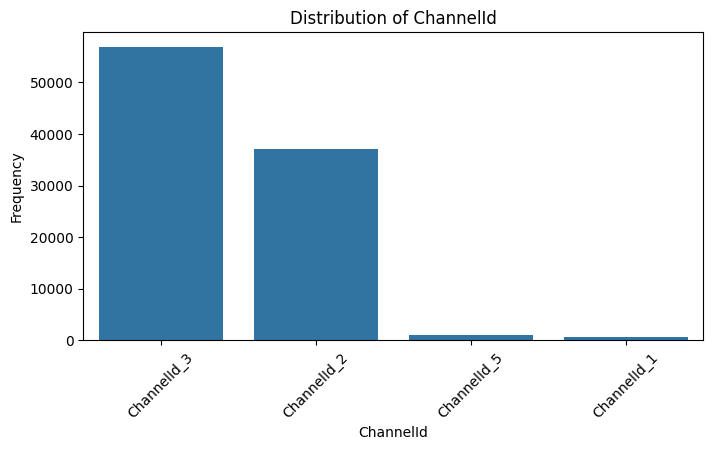

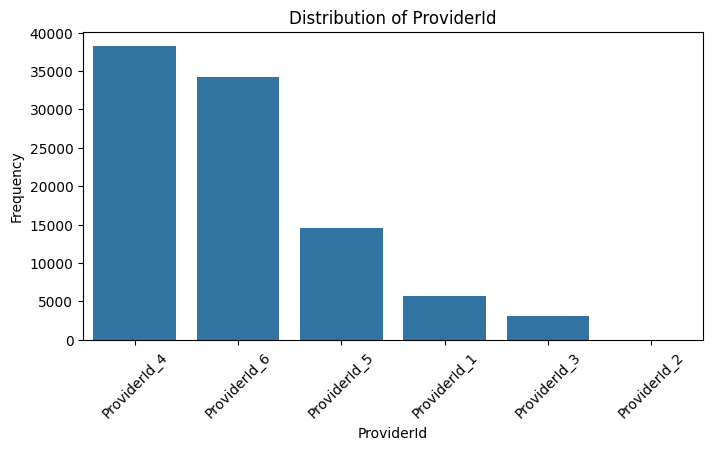

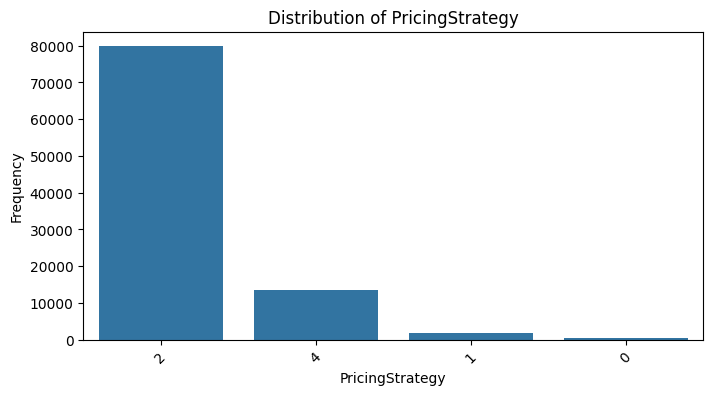

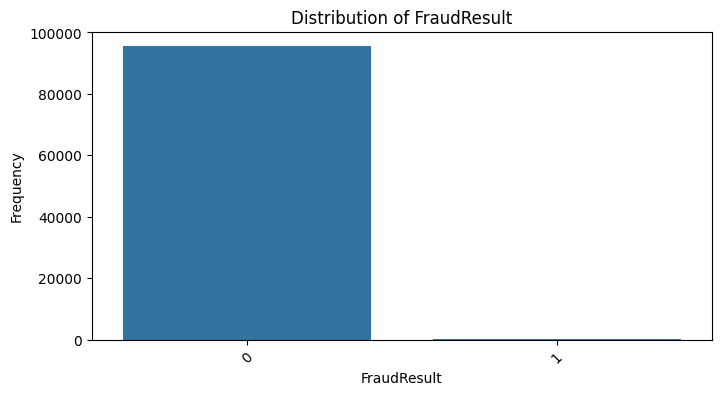

In [6]:
cat_cols = ['ProductCategory', 'ChannelId', 'ProviderId', 'PricingStrategy', 'FraudResult']

for col in cat_cols:
    ploter.plot_categorical(df, col)

## Correlation Analysis

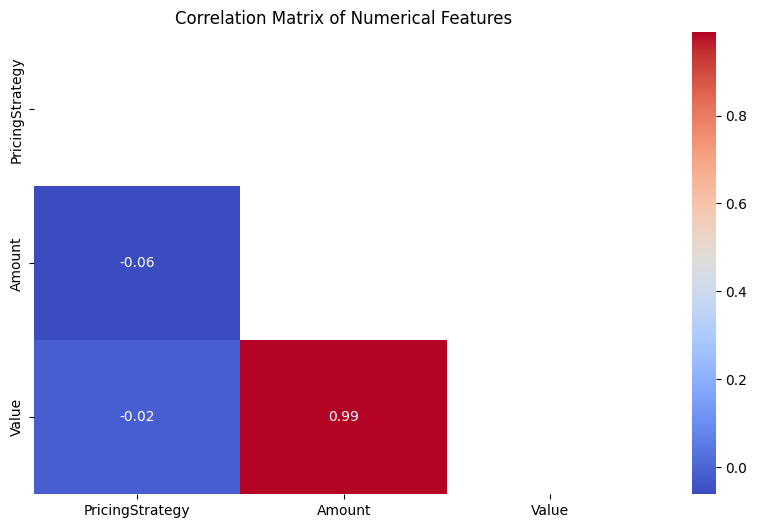

In [7]:
num_cols = ['PricingStrategy','Amount','Value']
ploter.corr_plot(df, num_cols)

## Checking Missing value

In [8]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_counts

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

## Box Plot Visualization

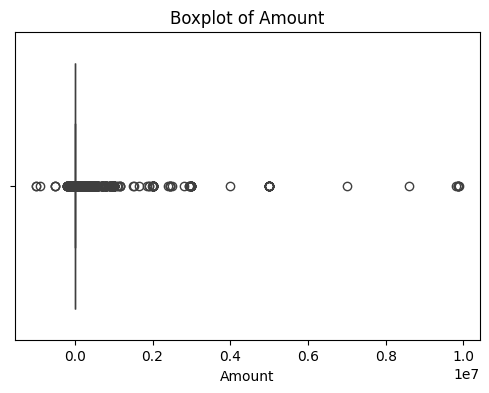

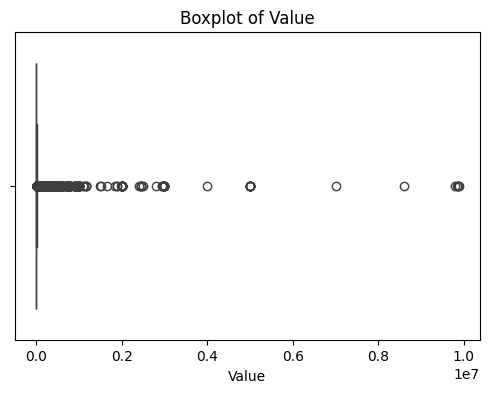

In [9]:
for col in num_list:
    ploter.plot_box(df, col)

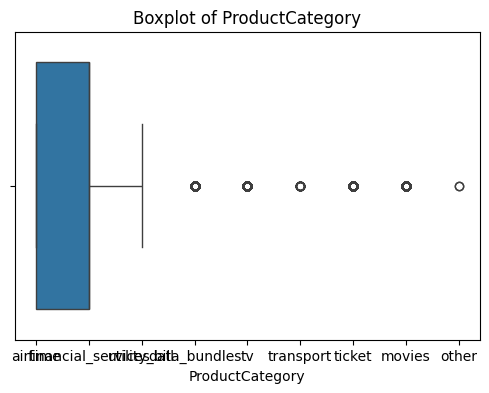

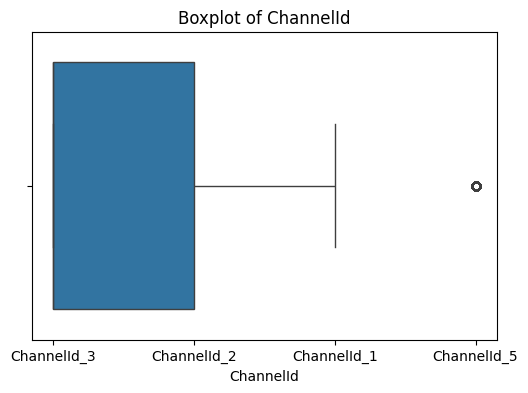

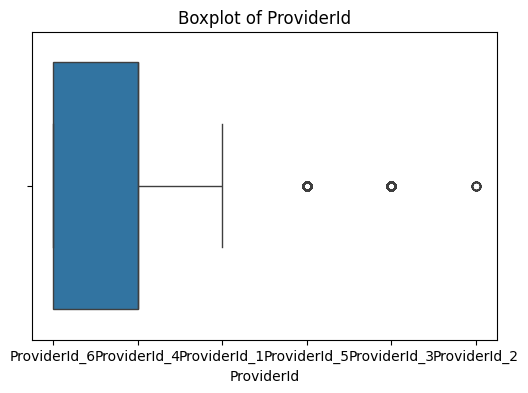

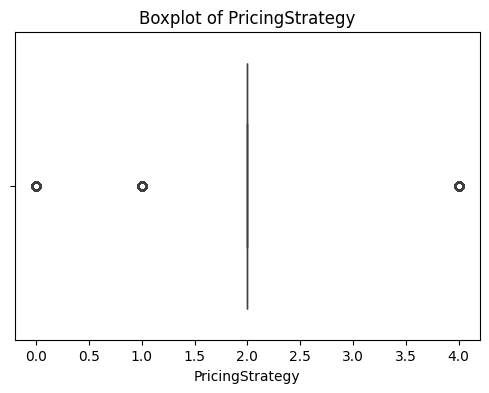

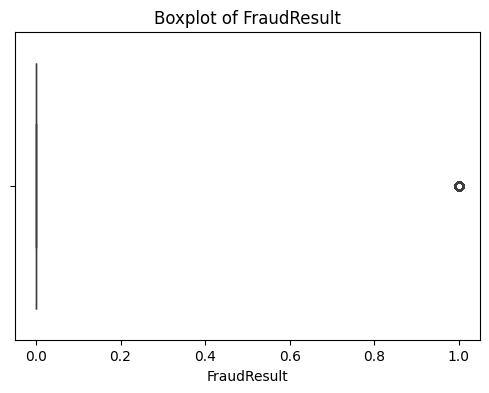

In [10]:
for col in cat_cols:
    ploter.plot_box(df, col)

# Key EDA Insights

## 1.Strong Multicollinearity Between Amount and Value
The correlation matrix reveals an extremely high positive correlation (≈ 0.99) between Amount and Value, indicating that both features capture nearly the same underlying transaction magnitude. Retaining both variables may introduce multicollinearity into downstream models. Therefore, dropping one of these features is unlikely to result in significant information loss and may improve model stability and interpretability.

## 2.Severe Right-Skewness and Presence of Extreme Outliers
The distribution and box plots for Amount and Value show heavy right-skewness with numerous extreme outliers. Most transactions are clustered near zero, while a small number of transactions reach values as high as 10⁷. These extreme values are confirmed by the box plots and suggest the need for transformation techniques (e.g., logarithmic scaling) or robust aggregation methods before modeling.

## 3.Highly Imbalanced ProductCategory Distribution
The ProductCategory feature exhibits a highly uneven distribution, with financial_services and airtime dominating the dataset. All remaining categories (such as utilities, entertainment, transport, and others) appear infrequently. This imbalance may challenge classification tasks and suggests the need for category grouping or specialized encoding techniques to avoid bias toward dominant classes.

## 4.Dominance of a Few ProviderId and ChannelId Categories
Both ProviderId and ChannelId demonstrate strong categorical imbalance. A small number of providers and channels account for the majority of transactions, while several categories appear rarely. As a result, any analysis or predictive model will be heavily influenced by these dominant groups, and care must be taken when interpreting patterns related to infrequent categories.

## 5.Weak Linear Relationship Between PricingStrategy and Transaction Magnitude
The PricingStrategy feature shows only a weak negative linear correlation with both Amount (−0.06) and Value (−0.02). This indicates that pricing strategy alone is not a strong linear predictor of transaction size. Its predictive value may emerge only through interaction effects or when combined with other behavioral features during feature engineering.